In [1]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import networkx as nx
import matplotlib.pyplot as plt

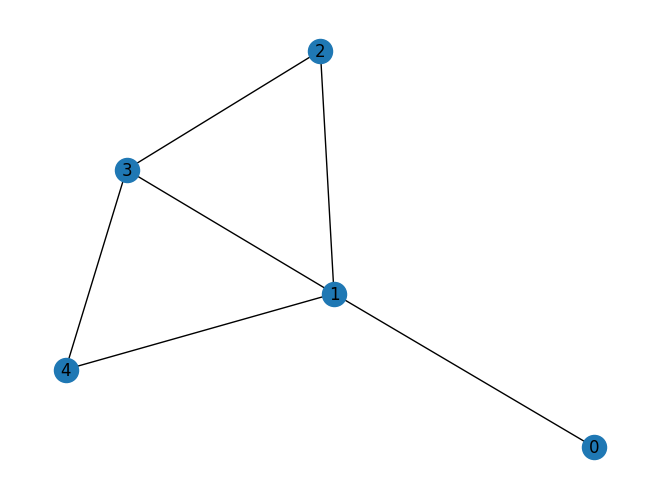

In [2]:
# Make a basic graph to test with
G = nx.Graph(gweight=jnp.array([0.0,3.0]))
G.add_node(0, nweight=jnp.array([3.0, 4.0]))
G.add_node(1, nweight=jnp.array([5.0, 6.0]))
G.add_node(2, nweight=jnp.array([5.0, 6.0]))
G.add_node(3, nweight=jnp.array([5.0, 6.0]))
G.add_node(4, nweight=jnp.array([5.0, 6.0]))
G.add_edge(0,1, eweight=jnp.array([1.0, 2.0]))
G.add_edge(1,2, eweight=jnp.array([2.0, 3.0]))
G.add_edge(2,3, eweight=jnp.array([2.0, 3.0]))
G.add_edge(3,4, eweight=jnp.array([3.0, 4.0]))
G.add_edge(4,1, eweight=jnp.array([2.0, 3.0]))
G.add_edge(3,1, eweight=jnp.array([1.0,2.0]))

nx.draw(G, with_labels=True)

In [3]:
# Function to get Nodes, Edges, Adjacency List, and Global tensors of 
# a networkx graph
def getNEALU(G):
    N = jnp.array([G.nodes[n]["nweight"] for n in G.nodes])
    E = jnp.array([G.edges[e]["eweight"] for e in G.edges])
    AL = jnp.array([e for e in G.edges])
    U = jnp.array([G.graph[p] for p in G.graph])
    return N, E, AL, U

N, E, AL, U = getNEALU(G)
print("Nodes (N):")
print(N)
print("Edges (E):")
print(E)
print("Adjacency List (AL):")
print(AL)
print("Global Props(U):")
print(U)

Nodes (N):
[[3. 4.]
 [5. 6.]
 [5. 6.]
 [5. 6.]
 [5. 6.]]
Edges (E):
[[1. 2.]
 [2. 3.]
 [2. 3.]
 [1. 2.]
 [2. 3.]
 [3. 4.]]
Adjacency List (AL):
[[0 1]
 [1 2]
 [1 4]
 [1 3]
 [2 3]
 [3 4]]
Global Props(U):
[[0. 3.]]


False

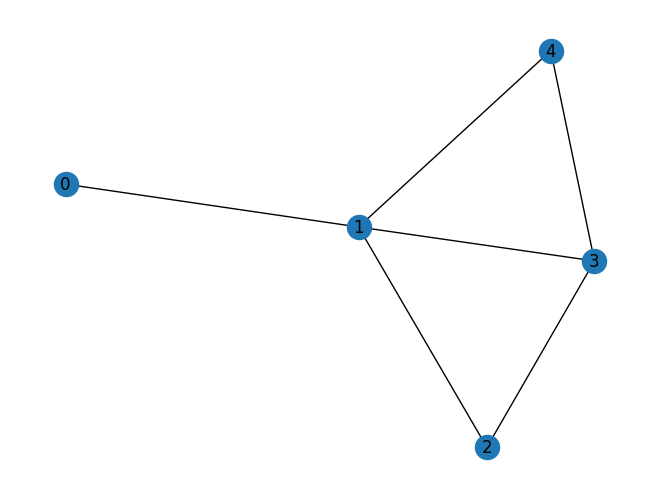

In [8]:
#Function to reconstruct a networkx graph from N,E, AL, U tensors
def reconstructNEALU(N, E, AL, U):
    G = nx.Graph(gweight=U[0,:])

    for i in range(N.shape[0]):
        G.add_node(i,nweight=N[i,:])
    G.nodes[1]
    for i in range(E.shape[0]):
        N1 = int(AL[i,0])
        N2 = int(AL[i,1])
        G.add_edge(N1, N2, eweight=E[i,:])

    return G

G2 = reconstructNEALU(N, E, AL, U)
nx.draw(G2, with_labels=True)

In [14]:
G.graph

{'gweight': [0.0, 3.0]}

In [15]:
G2.graph

{'gweight': Array([0., 3.], dtype=float32)}